In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True) 

Mounted at /content/drive


In [ ]:
# Importing necessary packages
# numpy, pandas for handling data
# re - regular expressions
# Plotting libraries - 
import numpy as np
import pandas as pd
import re

# For getting the directory structure
import glob

# For Plotting Charts - matplotlib, seaborn, plotly
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

# importing nltk for data cleaning
import nltk
import nltk.stem.wordnet
nltk.download('punkt')

# TextBlob for 
from textblob import TextBlob

# Spacy for Named Entity Recognition Analysis
import spacy   
!python -m spacy download en_core_web_lg

# For Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 827.9 MB 914 kB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=6d68ce96d4b7f0b465d92320e1f35b42826ff99798de38a96bfb7ad69ab8b30a
  Stored in directory: /tmp/pip-ephem-wheel-cache-8k3l_8nx/wheels/11/95/ba/2c36cc368c0bd339b44a791c2c1881a1fb714b78c29a4cb8f5
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
# Setting folder path of the project/data files
data_path = 'drive/My Drive/Training resources/Dip in AL ML/project-71/' 

In [ ]:
# Checking the files in the shared folder
for name in glob.glob(data_path + '*'):
    print(name)

drive/My Drive/Training resources/Dip in AL ML/project-71/Phase-III
drive/My Drive/Training resources/Dip in AL ML/project-71/Project Organization: UoH and AppliedRoots.gdoc
drive/My Drive/Training resources/Dip in AL ML/project-71/Kaggle-News Category Dataset.zip
drive/My Drive/Training resources/Dip in AL ML/project-71/News_Category_Dataset_v2.json
drive/My Drive/Training resources/Dip in AL ML/project-71/Phase-I
drive/My Drive/Training resources/Dip in AL ML/project-71/Phase-II
drive/My Drive/Training resources/Dip in AL ML/project-71/71_CATEGORIZE_NEWS_ARTICLES.gdoc
drive/My Drive/Training resources/Dip in AL ML/project-71/Projects_phase_2.gslides
drive/My Drive/Training resources/Dip in AL ML/project-71/GENERATORS (1).ipynb
drive/My Drive/Training resources/Dip in AL ML/project-71/movie review
drive/My Drive/Training resources/Dip in AL ML/project-71/Models
drive/My Drive/Training resources/Dip in AL ML/project-71/Final
drive/My Drive/Training resources/Dip in AL ML/project-71/df_

In [ ]:
################################################################################
############### I. DATA ANALYSIS ###############################################
################################################################################
# Reading the Data file in JSON format and storing the data into the Dataframe
df = pd.read_json(data_path + 'News_Category_Dataset_v2.json', lines = True)
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [ ]:
# Printing the details of fields/columns in the data file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [ ]:
# Identify and remove Duplicates in the Dataframe
# 13 duplicate records are removed from the dataset
df.duplicated().sum()  #total duplicates
df.drop_duplicates(keep='last', inplace=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200840 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200840 non-null  object        
 1   headline           200840 non-null  object        
 2   authors            200840 non-null  object        
 3   link               200840 non-null  object        
 4   short_description  200840 non-null  object        
 5   date               200840 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 10.7+ MB


In [ ]:
# Check if there are any fields with NULL values
df.isnull().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

In [ ]:
########################################
#####  II.  DATA CLEANING ###################
########################################
# II.1.  Category Column
# II.1.1 Printing category-wise counts in the dataframe
df.category.value_counts()

POLITICS          32738
WELLNESS          17824
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9646
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3489
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2078
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1322
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

In [ ]:
# II.1.2. The following categories which represent the same can be merged.
# PARENTING and PARENTS
# THE WORLDPOST and WORLDPOST into WORLDPOST
# STYLE & BEAUTY and STYLE into STYLE & BEAUTY
# FOOD & DRINK and TASTE into FOOD & DRINK
# ARTS & CULTURE, CULTURE & ARTS and ARTS into ARTS & CULTURE
# TECH, SCIENCE into SCIENCE & TECH 
# COLLEGE and EDUCATION into EDUCATION
df['clean_category'] = df['category'].copy(deep=True)
df.clean_category = df.clean_category.map(lambda a: "PARENTING" if a == "PARENTS" else a)
df.clean_category = df.clean_category.map(lambda a: "WORLDPOST" if a == "THE WORLDPOST" else a)
df.clean_category = df.clean_category.map(lambda a: "WORLDPOST" if a == "WORLD NEWS" else a)
df.clean_category = df.clean_category.map(lambda a: "STYLE & BEAUTY" if a == "STYLE" else a)
df.clean_category = df.clean_category.map(lambda a: "FOOD & DRINK" if a == "TASTE" else a)
df.clean_category = df.clean_category.map(lambda a: "ARTS & CULTURE" if a == "CULTURE & ARTS" else a)
df.clean_category = df.clean_category.map(lambda a: "ARTS & CULTURE" if a == "ARTS" else a)
df.clean_category = df.clean_category.map(lambda a: "SCIENCE & TECH" if a == "TECH" else a)
df.clean_category = df.clean_category.map(lambda a: "SCIENCE & TECH" if a == "SCIENCE" else a)
df.clean_category = df.clean_category.map(lambda a: "EDUCATION" if a == "COLLEGE" else a)


# Printing category-wise counts again after merging the above categories
df.clean_category.value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200840 entries, 0 to 200852
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200840 non-null  object        
 1   headline           200840 non-null  object        
 2   authors            200840 non-null  object        
 3   link               200840 non-null  object        
 4   short_description  200840 non-null  object        
 5   date               200840 non-null  datetime64[ns]
 6   clean_category     200840 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 12.3+ MB


In [ ]:
# Associate Category names with numerical index and save it in new column category_id
df['clean_category_id'] = df['clean_category'].factorize()[0]

In [ ]:
# II.2.  Column - link
# II.2.1. Printing link-wise counts
df.link.value_counts()

https://www.huffingtonpost.comhttp://www.nytimes.com/2016/04/08/us/politics/ted-cruz-donors.html                                 2
https://www.huffingtonpost.comhttp://nymag.com/daily/intelligencer/2015/10/willie-nelson-crusade-stop-big-pot.html               2
https://www.huffingtonpost.comhttp://www.politico.com/story/2016/06/hardly-anybody-wants-to-speak-at-trumps-convention-224815    2
https://www.huffingtonpost.comhttps://medium.com/matter/on-gawker-s-problem-with-women-f1197d8c1a4e                              2
https://www.huffingtonpost.comhttp://nymag.com/daily/intelligencer/2016/05/hillary-clinton-candidacy.html                        2
                                                                                                                                ..
https://www.huffingtonpost.com/entry/new-hampshire-primary-polls_us_56baa8c3e4b08ffac1233aa8                                     1
https://www.huffingtonpost.com/entry/john-kasich-new-hampshire-primary_us_56ba9c27e

In [ ]:
# II.2.2. Checking the regular expression to retrieve the website URL from the link given
url = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', df.link[0])
url

['https://www.huffingtonpost.com']

In [ ]:
# II.2.3. Defining a function to return the website URL for all the links in the dataframe 
def getWebSiteLink (link): 
  return  re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', link)[0]

In [ ]:
# II.2.4. Getting website link for all the links in the datafame and setting as website_link
website_link = [getWebSiteLink (link) for link in df.link]
set(website_link)

{'https://www.huffingtonpost.com',
 'https://www.huffingtonpost.comhttp',
 'https://www.huffingtonpost.comhttps'}

In [ ]:
# II.2.5.  Removing the text - 'https://www.huffingtonpost.com' from the website link and copying it into clean_link column for analysis
df.head()

df["clean_link"]= df["link"].str.replace("https://www.huffingtonpost.com", "", case = False)
df.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



,category,headline,authors,link,short_description,date,clean_category,clean_category_id,clean_link
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28,SCIENCE & TECH,14,/entry/rim-ceo-thorsten-heins_us_5bb34b8ce4b0f...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28,SPORTS,10,/entry/maria-sharapova-stunned-victoria-azaren...
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28,SPORTS,10,/entry/super-bowl-upsets-the-mos_us_5bb69b1de4...
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28,SPORTS,10,/entry/aldon-smith-arrested-dui-49ers_us_5bb69...
200852,SPORTS,Dwight Howard Rips Teammates After Magic Loss ...,,https://www.huffingtonpost.com/entry/dwight-ho...,The five-time all-star center tore into his te...,2012-01-28,SPORTS,10,/entry/dwight-howard-rips-teammates-magic-horn...


In [ ]:
# II.2.6.  Cleaning the clean_link column after replacing "/", "-" and "_" with space (" ")
# This will be useful to get the word tokens from the link for analysis
def split_link(clean_link):
  tokens = re.split('[/\-_\ ]', clean_link)
  return ' '.join(tokens)

df["clean_link"] = df["clean_link"].apply(lambda x: split_link(x))

In [ ]:
# II.3  Column - Authors
# II.3.1 Printing auther-wise counts
df.authors.value_counts()
df["clean_authors"] = df['authors'].copy(deep=True)

In [ ]:
# II.3.2  Identify and Replace clean_authors field with empty value with UNKNOWN_AUTHOR
# There are around 36.6K rows without author
df.clean_authors = df.clean_authors.map(lambda a: "UNKNOWN_AUTHOR" if a == "" else a)
df.clean_authors.value_counts()

UNKNOWN_AUTHOR                                                                              36607
Lee Moran                                                                                    2423
Ron Dicker                                                                                   1913
Reuters, Reuters                                                                             1562
Ed Mazza                                                                                     1322
                                                                                            ...  
Nicole C. Kear, ContributorAuthor, "Now I See You: A Memoir"                                    1
AMANDA LEE MYERS, AP                                                                            1
Mario De Leo Winkler, ContributorPostdoctoral researcher in astrophysics at UC Riverside        1
Kelly MacLean, ContributorStand up comic, actress, writer @thekellymaclean                      1
John Giacobbi, Contr

In [ ]:
# II.3.3. Counting the number of unique author and then printing the name
print(df['clean_authors'].nunique())
df['clean_authors'].unique()

27993


array(['Melissa Jeltsen', 'Andy McDonald', 'Ron Dicker', ...,
       'Courtney Garcia, Contributor\nI tell stories and drink wine.',
       'Mateo Gutierrez, Contributor\nArtist',
       'John Giacobbi, Contributor\nTales from the Interweb by The Web Sheriff'],
      dtype=object)

In [ ]:
# II.3.4. Replacing the space between the clean_authors name as Underscore and writing them as a concatenated string 
df['clean_authors'] = df['clean_authors'].apply(lambda x: x.split(',')[0])
df['clean_authors'] = df['clean_authors'].str.replace(' ', '_', regex=False)
df['clean_authors'].unique()

array(['Melissa_Jeltsen', 'Andy_McDonald', 'Ron_Dicker', ...,
       'Sarah_Costa', 'Mateo_Gutierrez', 'John_Giacobbi'], dtype=object)

In [ ]:
# II.3.5 Counting the contributions of different clean_authors 
print(df.groupby('clean_authors').size())

clean_authors
"Seth_Eliot"_Santoro    1
#DoctorsSpeakOut        1
'The_Koch_Sisters'      1
*                       1
10                      1
                       ..
Éloïse_Bouton           1
レシピブログ通信                1
吉野ゆりえ                   1
渋谷健司                    1
딘_베이커                   8
Length: 24024, dtype: int64


In [ ]:
# II.3.6. Printing the categories of news articles written by the author "Lee Moran"
df[df.clean_authors == 'Lee Moran'].clean_category.value_counts()

Series([], Name: clean_category, dtype: int64)

In [ ]:
# II.4  Column - news_text (combination of headline and short_description)
# II.4.1 Combining headline and short_description columns into news_text
# short_description has empty values for around 19K records. So combining headline 
# and short_description nto news_text will give inputs with more data
# Identifying the language of the text using langdetect package
# clean_category, clean_authors, clean_link, date and news_text will be used for the analysis
df['headline_word_count'] = df["headline"].apply(lambda x: len(str(x).split(" ")))
df['short_description_word_count'] = df["short_description"].apply(lambda x: len(str(x).split(" ")))
df['headline_char_count'] = df["headline"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['short_description_char_count'] = df["short_description"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
print (" short_description with empty string ---> ", df[df['short_description_char_count'] == 0].count)
df['news_text'] = df[['headline', 'short_description']].agg(' '.join, axis=1)

# del df['headline']
# del df['short_description']

#df.head()
df.info()

 short_description with empty string --->  <bound method DataFrame.count of               category                                           headline  \
12099           COMEDY                                  The Big Blue Wave   
12849       WORLD NEWS  Inside Rukban Camp, One Of Syria’s Most Desper...   
14119       WORLD NEWS  Syrian Refugees Return From Lebanon Only To Fl...   
23549            TASTE  Your Guide To The Best BBQ In St. Louis Accord...   
25814           COMEDY                                   The Bechdel Test   
...                ...                                                ...   
198250    QUEER VOICES  True LGBTQ Stories: When A College Football Te...   
198265     ENVIRONMENT  'Chasing Ice' -- The Climate Change Debate Is ...   
200129          IMPACT  Practice for International Kissing Day: 'Love ...   
200191    QUEER VOICES  Zach Huston, Victim of Brutal Ohio School Bull...   
200266  STYLE & BEAUTY    5 Nail Trends That You Can Actually Do Yourself   


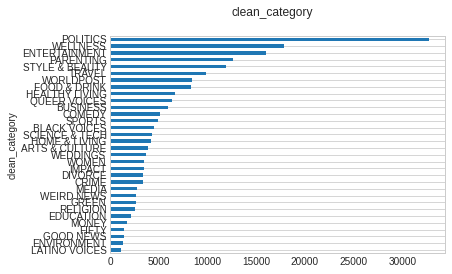

In [ ]:
#########################################################
############### III. DATA VISUALIZATION #################
#########################################################
# III.1.  Category-wise count
# In order to understand the composition of the dataset, 
# looking into univariate distributions by showing labels frequency with a bar plot.
def plotDistributions(x):
  fig, ax = plt.subplots()
  fig.suptitle(x, fontsize=12)
  df[x].reset_index().groupby(x).count().sort_values(by= "index").plot(kind="barh", legend=False, ax=ax).grid(axis='x')
  plt.show()

a = "clean_category"
plotDistributions(a)


In [ ]:
# III.2.  Date column 
# III.2.1. Analysis based on news created Date column

import datetime
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

# Lets find out the unique values of months and year in the dataset
print('The data are of {} years'.format(df['year'].nunique()))
print("The years are ")
print(df['year'].unique())

print('The data are of {} months'.format(df['month'].nunique()))
print("The months are ")
print(df['month'].unique())

df.head()


The data are of 7 years
The years are 
[2018 2017 2016 2015 2014 2013 2012]
The data are of 12 months
The months are 
[ 5  4  3  2  1 12 11 10  9  8  7  6]


,category,headline,authors,link,short_description,date,clean_category,clean_category_id,clean_link,clean_authors,headline_word_count,short_description_word_count,headline_char_count,short_description_char_count,news_text,year,month
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,CRIME,0,entry texas amanda painter mass shooting us 5...,Melissa_Jeltsen,14,13,51,64,There Were 2 Mass Shootings In Texas Last Week...,2018,5
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,ENTERTAINMENT,1,entry will smith joins diplo and nicky jam fo...,Andy_McDonald,14,6,62,19,Will Smith Joins Diplo And Nicky Jam For The 2...,2018,5
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,ENTERTAINMENT,1,entry hugh grant marries us 5b09212ce4b0568a8...,Ron_Dicker,10,15,38,73,Hugh Grant Marries For The First Time At Age 5...,2018,5
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,ENTERTAINMENT,1,entry jim carrey adam schiff democrats us 5b0...,Ron_Dicker,11,14,59,73,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,2018,5
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,ENTERTAINMENT,1,entry julianna margulies trump poop bag us 5b...,Ron_Dicker,13,13,59,75,Julianna Margulies Uses Donald Trump Poop Bags...,2018,5


In [ ]:
# III.2.2 Visualizing data based on news creation year
# From the below it is evident that the max number of news headlines were published in 2013 followed by 2014 and 2016

# Plotting to see the yearwise news publishing
labels = df['year'].value_counts().index
values = df['year'].value_counts().values

colors = df['year']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo = "label+percent",
                               marker = dict(colors = colors))])
fig.show()

In [ ]:
# III.2.3  Analysing the data based on the month
# The months - March (3), May (5) and April (4) have more news headlines than other months
# Plotting to see the monthwise pattern of publishing of the news
labels = df['month'].value_counts().index
values = df['month'].value_counts().values

colors = df['month']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo = "label+percent",
                               marker = dict(colors = colors))])
fig.show()

In [ ]:
##############################################################################
############# IV. DATA PREPROCESSING ############################################
##############################################################################
'''
IV.1. Data cleaning needs to be done before feeding the data into training.  
Data cleaning involves the steps
converting the text into lowercase, punctuation removal, tokenization, stopwords removal, stemming and lemmatization

Preprocess a text.
:parameter
    :param text: string - name of field containing text
    :param stopwords_to_be_removed: list - list of stopwords to be removed
    :param stem_flag: bool - whether stemming is to be applied
    :param lemm_flag: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def preprocess_data(input_text, stem_flag=False, lemm_flag=True, stopwords_to_be_removed=None):
    # convert to lowercase and remove punctuations/characters and then strip
    input_text = re.sub(r'[^\w\s]', '', str(input_text).lower().strip())
            
    # convert from text to individual words
    text_tokens = input_text.split()

    # remove Stopwords
    if stopwords_to_be_removed is not None:
        text_tokens = [word for word in text_tokens if word not in 
                    stopwords_to_be_removed]
                
    ## Removing -ing, -ly, ... - Stemming
    if stem_flag == True:
        ps = nltk.stem.porter.PorterStemmer()
        text_tokens = [ps.stem(word) for word in text_tokens]
                
    ## Lemmatisation (convert the word into root word)
    if lemm_flag == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in text_tokens]
            
    ## construct text again from list
    input_text = ' '.join(text_tokens)
    return input_text

In [ ]:
# IV.2.  Cleaning the news_text data 
nltk.download('wordnet')
nltk.download('stopwords')

stopwords_list = nltk.corpus.stopwords.words("english")

df["clean_news_text"] = df["news_text"].apply(lambda x: preprocess_data(x, stem_flag=False, lemm_flag=True, stopwords_to_be_removed=stopwords_list))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# IV.3 Info of the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200840 entries, 0 to 200852
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   category                      200840 non-null  object        
 1   headline                      200840 non-null  object        
 2   authors                       200840 non-null  object        
 3   link                          200840 non-null  object        
 4   short_description             200840 non-null  object        
 5   date                          200840 non-null  datetime64[ns]
 6   clean_category                200840 non-null  object        
 7   clean_category_id             200840 non-null  int64         
 8   clean_link                    200840 non-null  object        
 9   clean_authors                 200840 non-null  object        
 10  headline_word_count           200840 non-null  int64         
 11  short_descrip

,category,headline,authors,link,short_description,date,clean_category,clean_category_id,clean_link,clean_authors,headline_word_count,short_description_word_count,headline_char_count,short_description_char_count,news_text,year,month,clean_news_text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,CRIME,0,entry texas amanda painter mass shooting us 5...,Melissa_Jeltsen,14,13,51,64,There Were 2 Mass Shootings In Texas Last Week...,2018,5,2 mass shootings texas last week 1 tv left hus...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,ENTERTAINMENT,1,entry will smith joins diplo and nicky jam fo...,Andy_McDonald,14,6,62,19,Will Smith Joins Diplo And Nicky Jam For The 2...,2018,5,smith joins diplo nicky jam 2018 world cups of...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,ENTERTAINMENT,1,entry hugh grant marries us 5b09212ce4b0568a8...,Ron_Dicker,10,15,38,73,Hugh Grant Marries For The First Time At Age 5...,2018,5,hugh grant marries first time age 57 actor lon...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,ENTERTAINMENT,1,entry jim carrey adam schiff democrats us 5b0...,Ron_Dicker,11,14,59,73,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,2018,5,jim carrey blasts castrato adam schiff democra...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,ENTERTAINMENT,1,entry julianna margulies trump poop bag us 5b...,Ron_Dicker,13,13,59,75,Julianna Margulies Uses Donald Trump Poop Bags...,2018,5,julianna margulies uses donald trump poop bags...


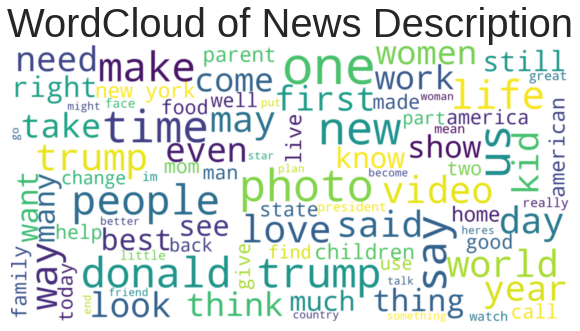

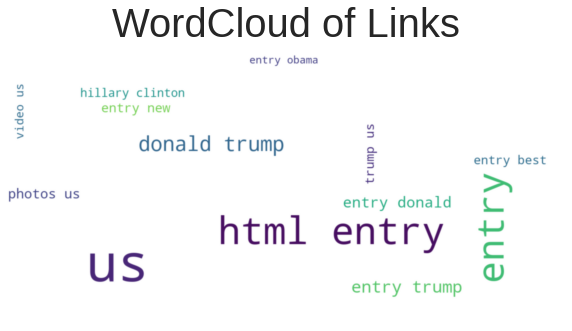

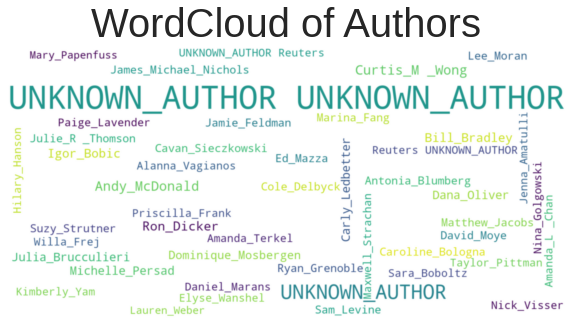

In [ ]:
###############################################################################
####################  V. WORD CLOUD ###########################################
###############################################################################
# Plotting the Wordcloud in the news description, clean_link and clean_authors
# Word Clouds are visual displays of text data – simple text analysis. Word Clouds 
# display the most prominent or frequent words in a body of text. 
# Typically, a Word Cloud will ignore the most common words in the language (“a”, “an”, “the” etc)
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(dfi, tit):
  word_cl = WordCloud(
                       width=1600,
                       height=800,
                       #colormap='PuRd', 
                       margin=0,
                       max_words=500, # Maximum numbers of words we want to see 
                        # Minimum numbers of letters of each word to be part of the cloud
                       max_font_size=150, min_font_size=30,  # Font size range
                       background_color="white").generate(" ".join(dfi))

  plt.figure(figsize=(10, 16))
  plt.imshow(word_cl, interpolation="gaussian")
  plt.title(tit, fontsize = 40)
  plt.axis("off")
  plt.show()

# Plotting the Wordcloud in the news description
plot_wordcloud(df['clean_news_text'], 'WordCloud of News Description')

# Plotting the Wordcloud in the news clean_link
plot_wordcloud(df['clean_link'], 'WordCloud of Links')

# Plotting the Wordcloud in the news clean_authors
plot_wordcloud(df['clean_authors'], 'WordCloud of Authors')



In [ ]:
##############################################################################
############   VI.  LENGTH ANALYSIS ###############################################
###############################################################################
# Extracting these values (word count, character count, sentence count, average word length
# average sentence length) from the headline, short_description and news_text  
# There are around 19.7K samples that have a short_description length of 0, 
# however all the articles have a headline. Going with the intuition that the headline 
# is often more descriptive of the clean_category of the news, as well as to provide more text 
# data to the model, added headline to the short_description and formed news_text as a new column 

df['word_count'] = df["news_text"].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df["news_text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['sentence_count'] = df["news_text"].apply(lambda x: len(str(x).split(".")))
df['avg_word_length'] = df['char_count'] / df['word_count']
df['avg_sentence_lenght'] = df['word_count'] / df['sentence_count']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/s

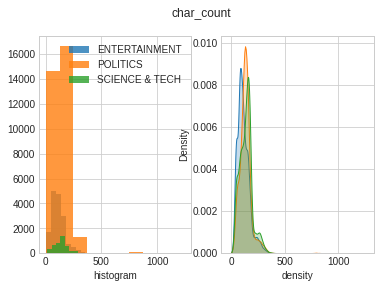

In [ ]:
# VI.1. 
# Split the whole set of observations into 3 samples (Politics, Entertainment, Tech), 
# then compare the histograms and densities of the samples based on news_text character count. 
# If the distributions are different then the variable is predictive because the
# 3 groups have different patterns.
# The 3 categories have a similar length distribution. Here, the density plot is
# very useful because the samples have different sizes.
def plot_histo_density(x,y, data_frame):
  fig, ax = plt.subplots(nrows=1, ncols=2)
  fig.suptitle(x, fontsize=12)
  
  for i in data_frame[y].unique():
      sns.distplot(data_frame[data_frame[y]==i][x], hist=True, kde=False, 
                  bins=10, hist_kws={"alpha":0.8}, 
                  axlabel="histogram", ax=ax[0])
      sns.distplot(data_frame[data_frame[y]==i][x], hist=False, kde=True, 
                  kde_kws={"shade":True}, axlabel="density",   
                  ax=ax[1])
  ax[0].grid(True)
  ax[0].legend(data_frame[y].unique())
  ax[1].grid(True)
  plt.show()

dftt = df[df["clean_category"].isin(['POLITICS', 'ENTERTAINMENT', 'SCIENCE & TECH'])]
a, b = "char_count", "clean_category"
plot_histo_density(a,b, dftt)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/s

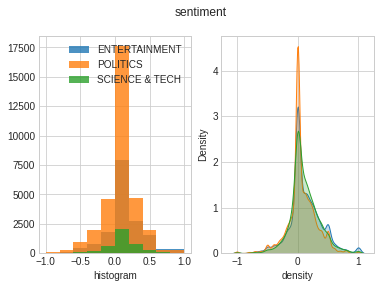

In [ ]:
#################################################################################
############ VIII.  SENTIMENTAL ANALYSIS ########################################
#################################################################################
# VIII.1  Textblob which is built on top of NLTK can assign 
# polarity to words and estimate the sentiment of the whole text as an average.
# Most of the headlines have a neutral sentiment, 
# Politics news is skewed on the negative tail, and SCIENCE & TECH news has 
# a spike on the positive tail.  ENTERTAINMENT is skewed on the positive tail
from textblob import TextBlob

df["sentiment"] = df["news_text"].apply(lambda x:TextBlob(x).sentiment.polarity)
df.head()

dftt = df[df["clean_category"].isin(['POLITICS', 'ENTERTAINMENT', 'SCIENCE & TECH'])]
a, b = "sentiment", "clean_category"
plot_histo_density(a, b, dftt)

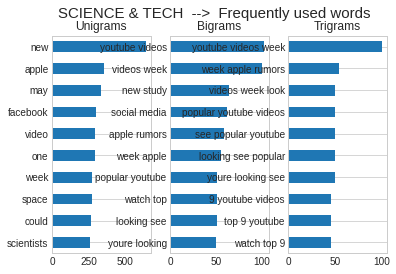

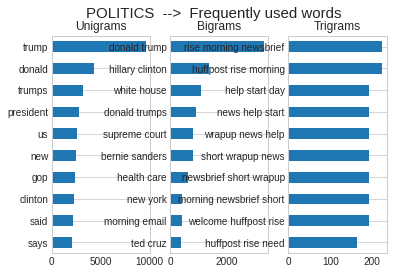

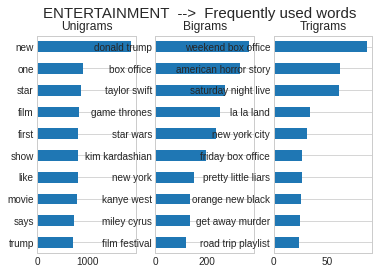

In [ ]:
################################################################################
###############  IX.  WORD FREQUENCY ###########################################
################################################################################
# Importance of single words by computing the n-grams frequency. An n-gram is a contiguous sequence 
# of n items from a given sample of text. When the n-gram has the size of 1 is referred to as a unigram 
# (size of 2 is a bigram). Size of 3 is a trigram
# Showing how to calculate unigrams, bigrams and trigrams frequency taking the sample of POLITICS, 
# ENTERTAINMENT and SCIENCE & TECH news.
def plot_most_used_words(y, x, how_many_words):
  corpus = df[df["clean_category"]==y][x]
  lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
  fig, ax = plt.subplots(nrows=1, ncols=3)
  chart_title = y +"  -->  "+"Frequently used words"
  fig.suptitle(chart_title, fontsize=15)
      
  ## unigrams
  dic_words_freq = nltk.FreqDist(lst_tokens)
  dft_uni = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
  dft_uni.set_index("Word").iloc[:how_many_words,:].sort_values(by="Freq").plot(
      kind="barh", title="Unigrams", ax=ax[0], 
                    legend=False).grid(axis='x')
  ax[0].set(ylabel=None)
      
  ## bigrams
  dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
  dft_bi = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
  dft_bi["Word"] = dft_bi["Word"].apply(lambda x: " ".join(
                    string for string in x) )
  dft_bi.set_index("Word").iloc[:how_many_words,:].sort_values(by="Freq").plot(
      kind="barh", title="Bigrams", ax=ax[1],
                    legend=False).grid(axis='x')
  ax[1].set(ylabel=None)

  ## trigrams
  dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 3))
  dft_tri = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
  dft_tri["Word"] = dft_tri["Word"].apply(lambda x: " ".join(
                    string for string in x) )
  dft_tri.set_index("Word").iloc[:how_many_words,:].sort_values(by="Freq").plot(
      kind="barh", title="Trigrams", ax=ax[2],
                    legend=False).grid(axis='x')
  ax[2].set(ylabel=None)
 
  plt.show()

# Plotting Frequently used words in SCIENCE & TECH
a = "SCIENCE & TECH"
b = "clean_news_text"
plot_most_used_words(a, b, 10)

# Plotting Frequently used words in POLITICS
a = "POLITICS"
plot_most_used_words(a, b, 10)
 
# Plotting Frequently used words in ENTERTAINMENT
a = "ENTERTAINMENT"
plot_most_used_words(a, b, 10)


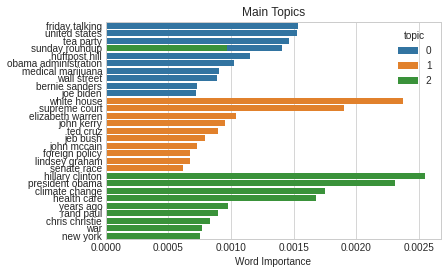

In [ ]:
################################################################################
################ X.  TOPIC MODELING ############################################
################################################################################
# The Genism package is specialized in topic modeling. A topic model is a type of 
# statistical model for discovering the abstract “topics” that occur in a collection of documents.
# show how to extract topics using LDA (Latent Dirichlet Allocation): a generative 
# statistical model that allows sets of observations to be explained by unobserved 
# groups that explain why some parts of the data are similar. Basically, documents 
# are represented as random mixtures over latent topics, where each topic is 
# characterized by a distribution over words.
import gensim

y = "POLITICS"
corpus = df[df["clean_category"]==y]["clean_news_text"]

## pre-process corpus
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i + 2]) for i in range(0, 
                     len(lst_words), 2)]
    lst_corpus.append(lst_grams)
## map words to an id
id2word = gensim.corpora.Dictionary(lst_corpus)
## create dictionary word:freq
dic_corpus = [id2word.doc2bow(word) for word in lst_corpus] 
## train LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=dic_corpus, id2word=id2word, num_topics=3, 
                                            random_state=123, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
   
## output
lst_dics = []
for i in range(0,3):
    lst_tuples = lda_model.get_topic_terms(i)
    for tupla in lst_tuples:
        lst_dics.append({"topic":i, "id":tupla[0], 
                         "word":id2word[tupla[0]], 
                         "weight":tupla[1]})
dtf_topics = pd.DataFrame(lst_dics, 
                         columns=['topic','id','word','weight'])
    
## plot
fig, ax = plt.subplots()
sns.barplot(y="word", x="weight", hue="topic", data=dtf_topics, dodge=False, ax=ax).set_title('Main Topics')
ax.set(ylabel="", xlabel="Word Importance")
plt.show()

**Feature Engineering**

Text columns in a dataframe are converted to features using TFIDF.  Scikit-learn API provides **SelectKBest** class for extracting best features of given dataset. The SelectKBest method selects the features according to the k highest score. By changing the 'score_func' parameter we can apply the method for both classification and regression data. Selecting best features is important process when we prepare a large dataset for training. It helps us to eliminate less important part of the data and reduce a training time. 

In [ ]:
################################################################################
################  XI.  FEATURE EXTRACTION ######################################
################################################################################
#vectorizer = TfidfVectorizer(#tokenizer=tokenize, #provide a tokenizer if it is available
#                                 sublinear_tf=True, 
#                                 smooth_idf = True,
#                                 max_df=0.5,
#                                 stop_words='english')

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2), lowercase=False,
                              sublinear_tf=True, 
                              smooth_idf = True,
                              max_df=0.5,
                              stop_words='english')
dftt = df[df["clean_category"].isin(['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY'])]

df_train = dftt.sample(frac=.7)
df_test = dftt.sample(frac=.3)
y_train = df_train['clean_category']
X_train = vectorizer.fit_transform(df_train['clean_news_text']) #fit_transform on training data
X_test = vectorizer.transform(df_test['clean_news_text']) #just transform on test dat

ch2 = SelectKBest(chi2, k=5000)
X_train = ch2.fit_transform(X_train, y_train)
X_test = ch2.transform(X_test)
feature_names = vectorizer.get_feature_names_out()

selected_feature_names = [feature_names[i] for i in ch2.get_support(indices=True)]
print(selected_feature_names)
print(df_train['clean_news_text'][0:1])
print(X_train[0:1])
#print(y_train[0:10])

['10', '10 best', '10 reasons', '10 things', '10 tips', '10 ways', '100 days', '100 pounds', '11', '11 things', '12', '13', '14', '2012', '2012 photos', '2012 red', '2013', '2013 photos', '2013 red', '2014', '2015', '2016', '2016 election', '2016 presidential', '2017', '2018', '31 days', '3d', '500', '60s', '66', '70s', '80s', '90s', '911', 'aaron', 'abandoned', 'abc', 'abercrombie', 'ability', 'able', 'able identify', 'aboard', 'abortion', 'abortions', 'abrams', 'abroad', 'abs', 'abuse', 'academy', 'academy awards', 'acceptance', 'access', 'accessories', 'accessory', 'accomplish', 'according', 'according new', 'according tripadvisor', 'accused', 'accusers', 'accuses', 'achieve', 'achieving', 'acid', 'aclu', 'acne', 'act', 'action', 'actions', 'active', 'activists', 'activities', 'activity', 'actor', 'actors', 'actress', 'actresses', 'acupuncture', 'ad', 'adam', 'adam levine', 'adaptation', 'add', 'addicted', 'addiction', 'addictive', 'address', 'addresses', 'adele', 'adeles', 'adhd', 

In [ ]:
# Saving Dataframe with the cleaned data and additional fields to a file. This can be used for modeling analysis 
df.to_csv(r'drive/My Drive/Training resources/Dip in AL ML/project-71/news_datafame.csv', index=False)


**Dimensionality Reduction**

We performed a dimensionality reduction technique to plot the observations in 2 dimensions.

There are 2 dimenality techniques used:

**Principal Component Analysis:** This technique relies on the obtention of the eigenvalues and eigenvectors of the data matrix and tries to provide a minimum number of variables that keep the maximum amount of variance.  This is not executed due to sparse matrix

**t-SNE:** T-Distributed Stochastic Neighbor Embedding, or t-SNE, is a machine learning algorithm and it is often used to embedding high dimensional data in a low dimensional space. 

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

def plot_dim_red(model, features, labels, n_components=2):
    
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=2)
        title = "t-SNE decomposition" 

    else:
        return "Error"
    
    # Fit and transform the features
    principal_components = mod.fit_transform(features)
    
    # Put them into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Now we have to paste each row's label and its meaning
    # Convert labels array to df
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    # Plot
    plt.figure(figsize=(10,10))
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_train,
                    palette=["red", "pink", "royalblue", "greenyellow", "lightseagreen"],
                    alpha=.7).set_title(title);

(26522, 5000)
(26522,)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



TSNE Dimensionality Reduction - Execution time: --- 196.06882762908936 seconds ---


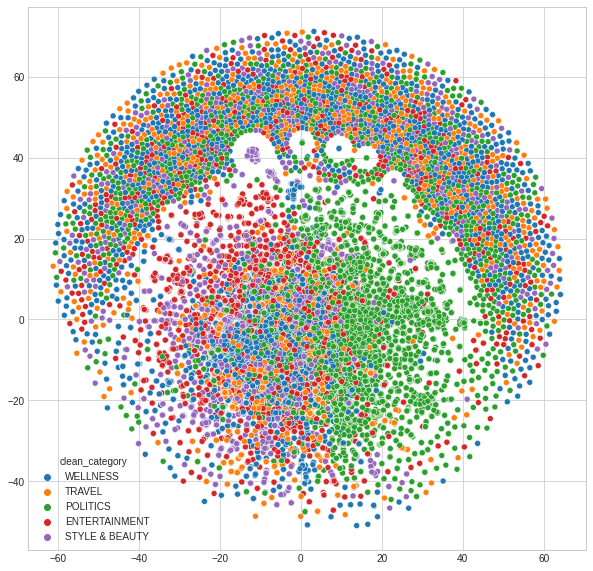

In [ ]:
from sklearn.manifold import TSNE
import time
start_time = time.time()
y_test = df_test['clean_category']

def plot_dimensionality_reduction (x_vect, y_label):
  print(x_vect.shape)  
  print(y_label.shape)
  plt.figure(figsize=(10,10))

  embedded_data=TSNE(n_components=2).fit_transform(x_vect, y_label)
  sns.scatterplot(x=embedded_data[:,0],y=embedded_data[:,1],hue=y_test,
                  legend='full'
                  #, palette=["red", "pink", "royalblue", "greenyellow", "lightseagreen"]
                  )
  print("TSNE Dimensionality Reduction - Execution time: --- %s seconds ---" % (time.time() - start_time))

plot_dimensionality_reduction (X_test, y_test)